In [ ]:
import pandas as pd
import io
import numpy as np
from sklearn import preprocessing 
from sklearn import svm
from sklearn import metrics
import math

In [ ]:
df = pd.read_csv("drive/My Drive/2011-capitalbikeshare-tripdata.csv")

In [ ]:
print(df.head())

   Duration           Start date  ... Bike number  Member type
0      3548  2011-01-01 00:01:29  ...      W00247       Member
1       346  2011-01-01 00:02:46  ...      W00675       Casual
2       562  2011-01-01 00:06:13  ...      W00357       Member
3       434  2011-01-01 00:09:21  ...      W00970       Member
4       233  2011-01-01 00:28:26  ...      W00346       Casual

[5 rows x 9 columns]


In [ ]:
df.drop(['End date','Start station number','End station number','Bike number'], axis=1, inplace=True)
df['Start date'] = pd.to_datetime(df['Start date'])
#df = df.set_index(['Start date'], drop=True)
df.head(10)

,Duration,Start date,Start station,End station,Member type
0,3548,2011-01-01 00:01:29,5th & F St NW,5th & F St NW,Member
1,346,2011-01-01 00:02:46,14th & Harvard St NW,14th & V St NW,Casual
2,562,2011-01-01 00:06:13,Georgia & New Hampshire Ave NW,Adams Mill & Columbia Rd NW,Member
3,434,2011-01-01 00:09:21,10th & U St NW,Florida Ave & R St NW,Member
4,233,2011-01-01 00:28:26,Adams Mill & Columbia Rd NW,Calvert & Biltmore St NW,Casual
5,158,2011-01-01 00:32:33,3rd & D St SE,4th & East Capitol St NE,Member
6,560,2011-01-01 00:35:48,14th & Rhode Island Ave NW,15th & P St NW,Member
7,503,2011-01-01 00:36:42,14th & Rhode Island Ave NW,15th & P St NW,Member
8,449,2011-01-01 00:45:55,15th & P St NW,14th & R St NW,Member
9,442,2011-01-01 00:46:06,15th & P St NW,14th & R St NW,Member


In [ ]:
x1_data = df['Duration']
x2_data = df['Start date']
x3_data = df['Start station']
x4_data = df['Member type']
Y = df['End station']

In [ ]:
x3_data

0                              5th & F St NW
1                       14th & Harvard St NW
2             Georgia & New Hampshire Ave NW
3                             10th & U St NW
4                Adams Mill & Columbia Rd NW
                         ...                
1226762                       15th & P St NW
1226763    Convention Center / 7th & M St NW
1226764              Lamont & Mt Pleasant NW
1226765                       21st & I St NW
1226766                       18th & M St NW
Name: Start station, Length: 1226767, dtype: object

In [ ]:
def Conversion2Num(qqq,ttt):
  for i in range(len(qqq)):
    for j in range(len(ttt)):
      if qqq[i] == ttt[j]:
        ttt[j] = i

In [ ]:
#轉換start station為list
temp3=x3_data
train_data = np.array(temp3)
train_x3_list=train_data.tolist()
X3 = set(train_x3_list)
X3 = list(X3)
Conversion2Num(X3,train_x3_list)

In [ ]:
print(train_x3_list[0:11])

[65, 12, 25, 134, 51, 60, 5, 5, 68, 68, 35]


In [ ]:
#轉換End station為list
tempY=Y
train_data = np.array(tempY)
train_Y_list=train_data.tolist()
Conversion2Num(X3,train_Y_list)

In [ ]:
print(train_Y_list[0:10])

[65, 63, 51, 124, 15, 122, 68, 68, 132, 132]


In [ ]:
#轉換Member type為list
temp4=x4_data
train_data = np.array(temp4)
train_x4_list=train_data.tolist()
X4 = set(train_x4_list)
X4 = list(X4)
Conversion2Num(X4,train_x4_list)

In [ ]:
print(train_x4_list[0:11])

[2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0]


In [ ]:
#X3 & Y numcode Don't touch!!
key = []
for i in range(len(X3)):
  key.append(i)
print(key)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]


In [ ]:
dictionary = dict(zip(key, X3))
print(dictionary[63])

14th & V St NW


In [ ]:
#Member type numcode
key2 = []
for i in range(len(X4)):
  key2.append(i)
print(key2)
dictionary2 = dict(zip(key2, X4))

[0, 1, 2]


In [ ]:
print(dictionary2[1])

Unknown


In [ ]:
temp1=x1_data
train_data = np.array(temp1)
train_x1_list=train_data.tolist()

In [ ]:
print(type(train_x1_list))

<class 'list'>


In [ ]:
temp2=x2_data
train_data = np.array(temp2)
train_x2_list=train_data.tolist()

In [ ]:
print(train_x2_list[0])

1293840089000000000


In [ ]:
print(train_x1_list[0:10])
print(train_x2_list[0:10])
print(train_x3_list[0:10])
print(train_Y_list[0:10])
print(train_x4_list[0:10])

[3548, 346, 562, 434, 233, 158, 560, 503, 449, 442]
[1293840089000000000, 1293840166000000000, 1293840373000000000, 1293840561000000000, 1293841706000000000, 1293841953000000000, 1293842148000000000, 1293842202000000000, 1293842755000000000, 1293842766000000000]
[65, 12, 25, 134, 51, 60, 5, 5, 68, 68]
[65, 63, 51, 124, 15, 122, 68, 68, 132, 132]
[2, 0, 2, 2, 0, 2, 2, 2, 2, 2]


In [ ]:
from pandas.core.frame import DataFrame
c={"Duration" : train_x1_list,
   "Start_station" : train_x3_list,
   "End_station" : train_Y_list,
   "Member_type" : train_x4_list}#将列表a，b转换成字典
data=DataFrame(c)#将字典转换成为数据框
print(data)

         Duration  Start_station  End_station  Member_type
0            3548             65           65            2
1             346             12           63            0
2             562             25           51            2
3             434            134          124            2
4             233             51           15            0
...           ...            ...          ...          ...
1226762       300             68           21            2
1226763       387             67           68            2
1226764       261             79          115            2
1226765      2060             84           88            2
1226766       468             76          134            2

[1226767 rows x 4 columns]


In [ ]:
data['Start date'] = pd.to_datetime(df['Start date'])
#df = df.set_index(['Start date'], drop=True)
data.head(10)

,Duration,Start_station,End_station,Member_type,Start date
0,3548,65,65,2,2011-01-01 00:01:29
1,346,12,63,0,2011-01-01 00:02:46
2,562,25,51,2,2011-01-01 00:06:13
3,434,134,124,2,2011-01-01 00:09:21
4,233,51,15,0,2011-01-01 00:28:26
5,158,60,122,2,2011-01-01 00:32:33
6,560,5,68,2,2011-01-01 00:35:48
7,503,5,68,2,2011-01-01 00:36:42
8,449,68,132,2,2011-01-01 00:45:55
9,442,68,132,2,2011-01-01 00:46:06


In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = data[['Start_station', 'Member_type', 'Duration']].values
y = data['End_station'].values
X = preprocessing.scale(X)

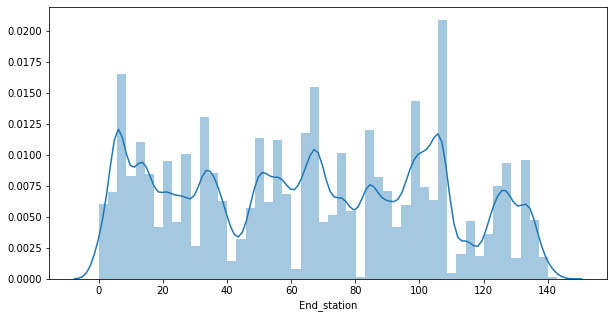

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(data['End_station'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

array([[ 0.05486627,  0.50203527, -0.29148747],
       [-0.92640897,  0.50203527, -0.11091192],
       [-0.85092626,  0.50203527, -0.32461318],
       ...,
       [-0.52383451,  0.50203527,  0.30315952],
       [ 0.13034899, -1.99190201, -0.00951491],
       [-0.19674276,  0.50203527, -0.17191171]])

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #訓練模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
dd = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dd1 = dd.head(10) #顯示實際值和預測值

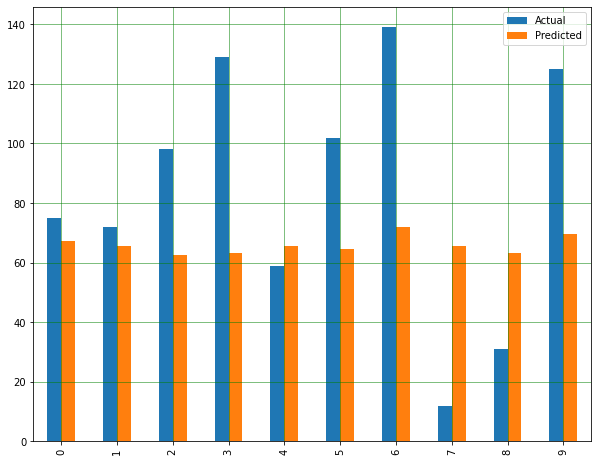

In [ ]:
dd1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 33.95185923305586
Mean Squared Error: 1565.8563540676516
Root Mean Squared Error: 39.57090287152482


In [ ]:
regressor.score(X_train, y_train)

0.002521749621803293